In [ ]:
# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# 1stBWhyzTgVv19TMRYDt0HxZ7Sr40pByx
id = '1stBWhyzTgVv19TMRYDt0HxZ7Sr40pByx'
df = pd.read_csv(f'https://docs.google.com/uc?export=download&id={id}')


In [ ]:
df.shape

(757, 755)

In [ ]:
df.head()


,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


In [ ]:
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df = df.drop('id', axis=1)

In [ ]:
df.head(3)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
2,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: object(754)
memory usage: 4.3+ MB


In [ ]:
# checking if any categorical data available in column or not
df.select_dtypes(include=['object']).columns

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', name=0, length=754)

In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB


In [ ]:
df.head(2)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1


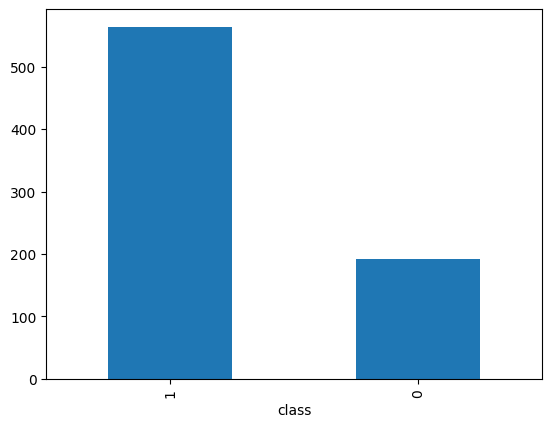

In [ ]:
# plot of class distribution
df['class'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# making balance data with SMOTE
from imblearn.over_sampling import SMOTE
X = df.drop('class', axis=1)
y = df['class']
sm = SMOTE(random_state=91)
X_res, y_res = sm.fit_resample(X, y)
df = pd.concat([X_res, y_res], axis=1)
df.shape

(1128, 754)

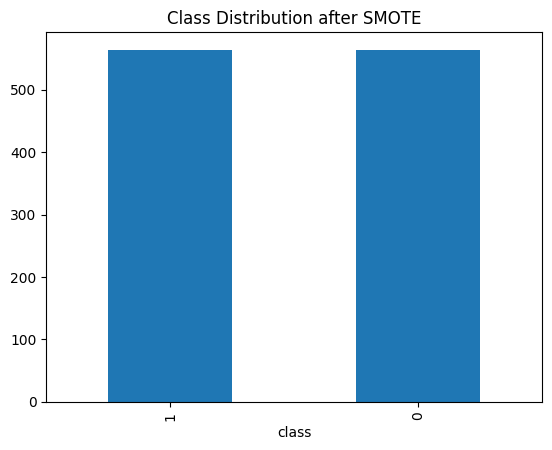

In [ ]:
# plot of class distribution
df['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
print('Summary of attribute datatypes:\n', df.dtypes.value_counts(), sep="")

Summary of attribute datatypes:
float64    749
int64        5
Name: count, dtype: int64


In [ ]:
print("Number of null values:", df.isnull().sum().sum())

Number of null values: 0


In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
y.value_counts()

,count
class,
1,564
0,564


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ( accuracy_score,
                             confusion_matrix,
                              classification_report,
                              roc_auc_score,
                              mean_squared_error,
                              mean_absolute_error,
                              r2_score,
                              roc_curve,
                              auc,
                              precision_score,
                              recall_score,
                              f1_score,
                              precision_recall_curve,

                              )
from sklearn.model_selection import learning_curve
import seaborn as sns


In [ ]:
def EvaluateResult(X_test, y_test, model_name):
    y_pred = model_name.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    y_prob = model_name.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    train_error = 1 - model_name.score(X_train, y_train)
    test_error = 1 - model_name.score(X_test, y_test)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))


    axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_title('Receiver Operating Characteristic')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend(loc="lower right")

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    axes[2].plot([0, 1], [train_error, train_error], label="Train Error")
    axes[2].plot([0, 1], [test_error, test_error], label="Test Error")
    axes[2].set_title("Train/Test Error Curves")
    axes[2].set_xlabel("Model Complexity")
    axes[2].set_ylabel("Error")
    axes[2].legend()

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

Without scaling training models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

# Display results
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.67
Decision Tree: Accuracy = 0.86
Random Forest: Accuracy = 0.98
KNN: Accuracy = 0.66
Naive Bayes: Accuracy = 0.61
Gradient Boosting: Accuracy = 0.96
XGBoost: Accuracy = 0.96


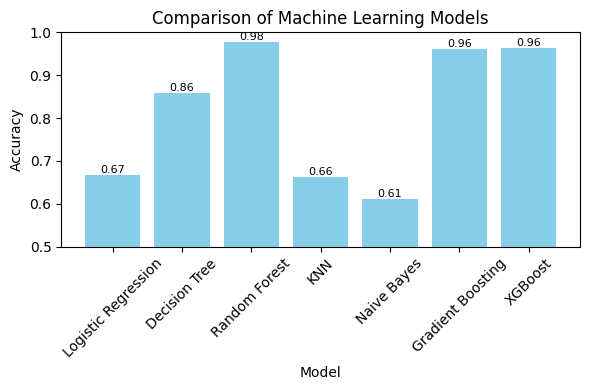

In [ ]:

# Display results as a bar plot
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(results.keys(), results.values(), color='skyblue')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Machine Learning Models')
ax.set_ylim([0.5, 1.0])

# Annotate each bar with the corresponding accuracy score
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Model: Logistic Regression
Accuracy: 0.668141592920354
              precision    recall  f1-score   support

           0       0.70      0.58      0.64       113
           1       0.64      0.75      0.69       113

    accuracy                           0.67       226
   macro avg       0.67      0.67      0.67       226
weighted avg       0.67      0.67      0.67       226



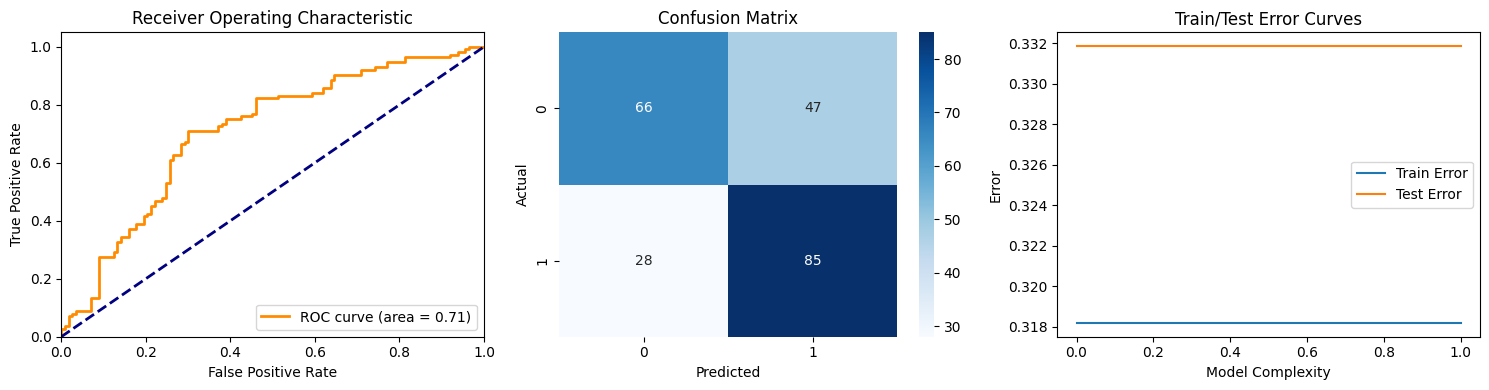

Model: Decision Tree
Accuracy: 0.8584070796460177
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       113
           1       0.89      0.81      0.85       113

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226



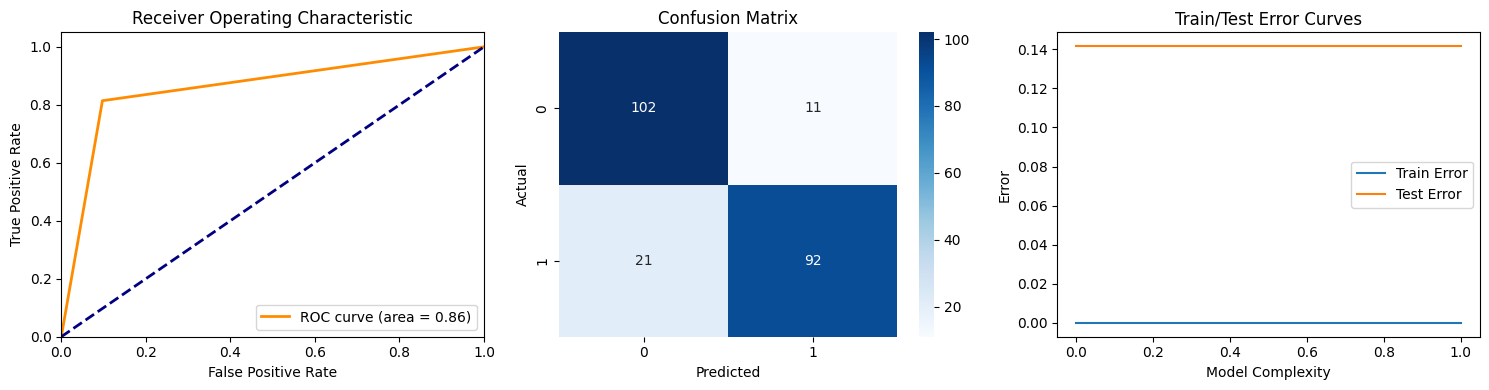

Model: Random Forest
Accuracy: 0.9778761061946902
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       113
           1       0.97      0.98      0.98       113

    accuracy                           0.98       226
   macro avg       0.98      0.98      0.98       226
weighted avg       0.98      0.98      0.98       226



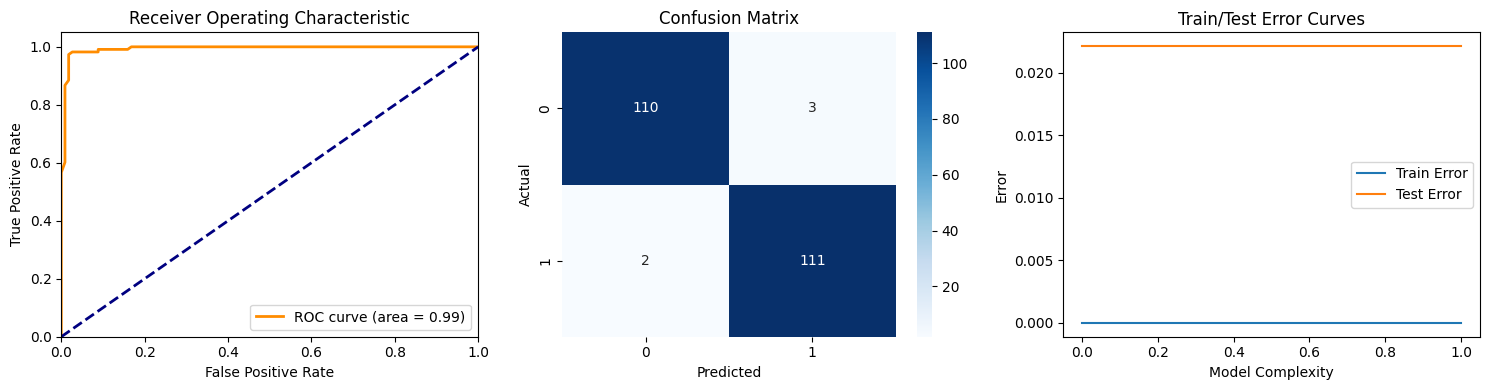

Model: KNN
Accuracy: 0.6637168141592921
              precision    recall  f1-score   support

           0       0.64      0.73      0.69       113
           1       0.69      0.59      0.64       113

    accuracy                           0.66       226
   macro avg       0.67      0.66      0.66       226
weighted avg       0.67      0.66      0.66       226



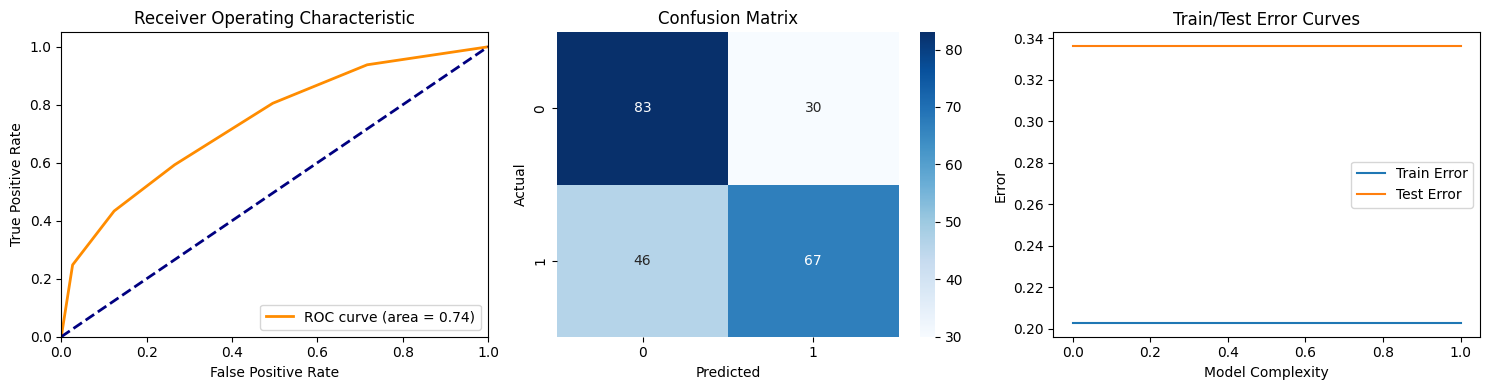

Model: Naive Bayes
Accuracy: 0.6106194690265486
              precision    recall  f1-score   support

           0       0.73      0.35      0.48       113
           1       0.57      0.87      0.69       113

    accuracy                           0.61       226
   macro avg       0.65      0.61      0.58       226
weighted avg       0.65      0.61      0.58       226



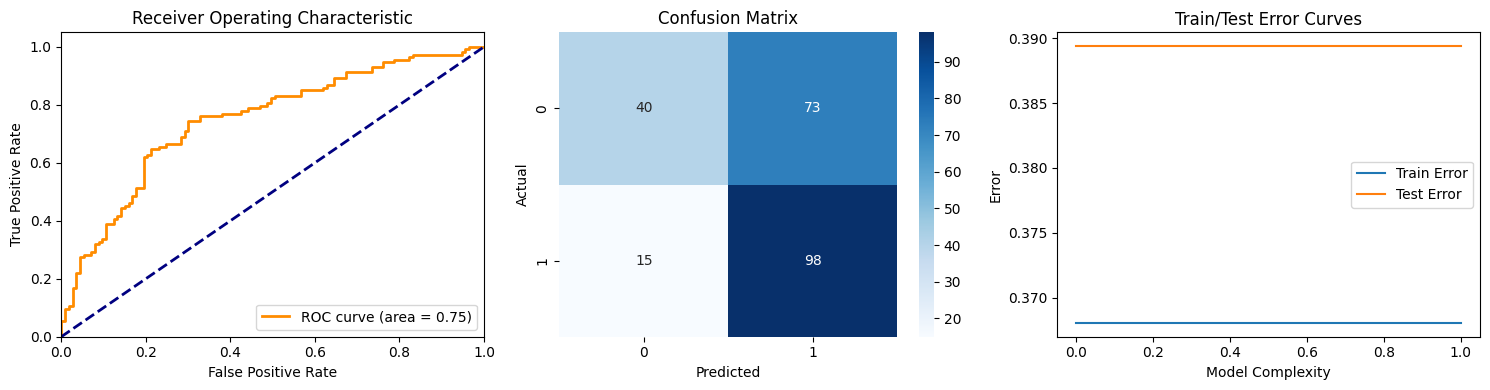

Model: Gradient Boosting
Accuracy: 0.9601769911504425
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.96      0.96      0.96       113

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



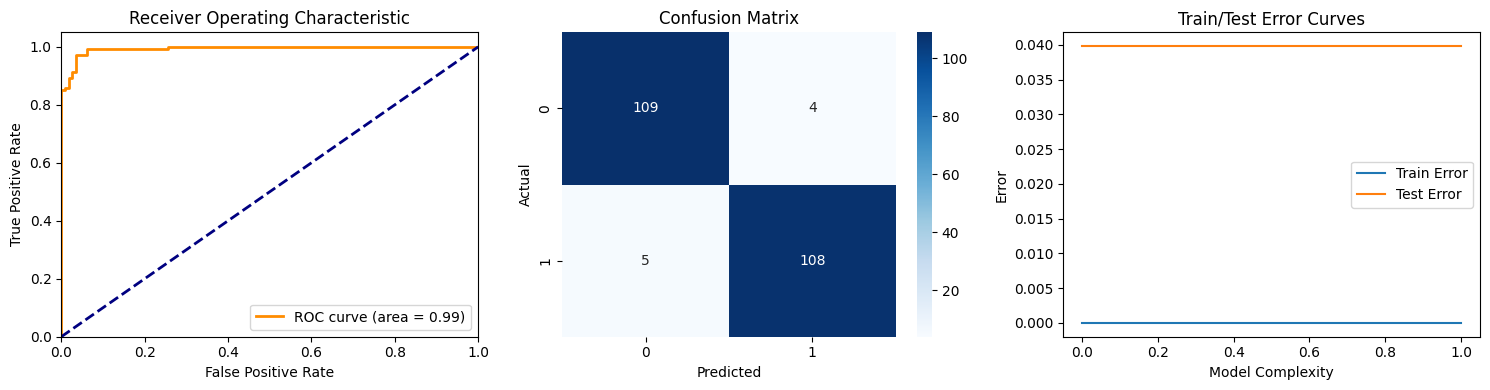

Model: XGBoost
Accuracy: 0.9646017699115044
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       113
           1       0.97      0.96      0.96       113

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



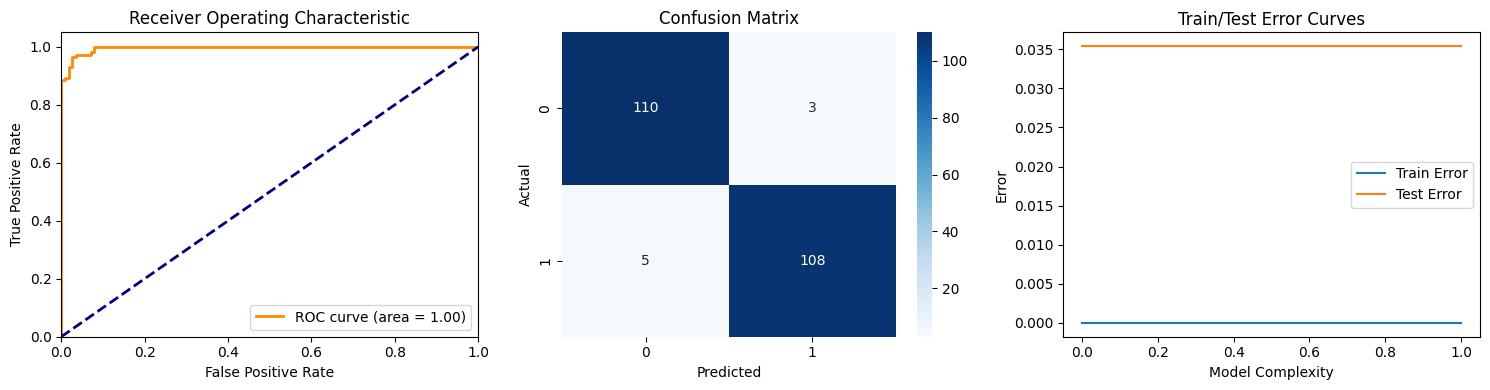

In [ ]:
for name, model in models.items():
    print(f"Model: {name}")
    EvaluateResult(X_test, y_test, model)

In [ ]:
df.shape

(1128, 754)

In [ ]:

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=0)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Best hyperparameters:", grid_search.best_params_)

# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# print("Accuracy on test set:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)
# print("\nConfusion Matrix:\n", cm)


Spliting and training model (Also if need, doing Min Max scaler)

In [ ]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Min-Max Normalization

In [ ]:
# min max scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_origin)
X_train = pd.DataFrame(scaler.transform(X_train_origin))
X_train.columns = X_train_origin.columns
# X_train['gender'] = X_train['gender'].astype('category')
X_train.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1.0,0.880974,0.519644,0.545096,0.251934,0.252212,0.570096,0.099541,0.137868,0.130638,...,0.008588,0.010620,0.020038,0.021540,0.016939,0.018761,0.042901,0.115432,0.333050,0.438911
1,0.0,0.910639,0.335922,0.171426,0.433149,0.433628,0.256138,0.007230,0.031981,0.019258,...,0.649938,0.777847,0.730350,0.972657,0.788240,0.526048,0.480542,0.483788,0.238899,0.067540
2,1.0,0.873242,0.347634,0.439197,0.176796,0.176991,0.916253,0.313619,0.132384,0.179480,...,0.000810,0.253903,0.024378,0.014071,0.088020,0.150656,0.067179,0.048838,0.047192,0.009671
3,0.0,0.883896,0.520613,0.349712,0.385635,0.386062,0.311313,0.014284,0.042599,0.028782,...,0.101391,0.065257,0.049427,0.077732,0.068195,0.051211,0.053670,0.033918,0.020868,0.009402
4,1.0,0.863015,0.875946,0.253661,0.280663,0.280973,0.499184,0.010613,0.045752,0.043485,...,0.000685,0.000449,0.135936,0.281404,0.090701,0.037629,0.050055,0.332915,0.612844,0.523532


In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test_origin[X_test_origin.columns]))
X_test.columns = X_test_origin.columns
# X_test['gender'] = X_test['gender'].astype('category')
X_test.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.0,0.927226,0.370382,0.298007,0.483978,0.484513,0.210265,0.007809,0.030669,0.016209,...,0.310709,0.364359,0.368435,0.460950,0.339947,0.259221,0.229884,0.113267,0.055373,0.028202
1,0.0,0.795768,0.493401,0.741603,0.332597,0.332965,0.393304,0.094302,0.161388,0.118255,...,0.004366,0.050939,0.011816,0.010483,0.010623,0.008437,0.011764,0.036979,0.037945,0.030513
2,0.0,0.887132,0.243198,0.140324,0.595580,0.596239,0.134387,0.010226,0.036103,0.014610,...,0.450909,0.492027,0.405740,0.309102,0.234152,0.249879,0.100511,0.055898,0.103996,0.120344
3,1.0,0.852173,0.531731,0.242123,0.323757,0.324115,0.409598,0.011856,0.057848,0.046193,...,0.000878,0.014190,0.008978,0.009110,0.005841,0.004004,0.024596,0.057276,0.026877,0.000624
4,0.0,0.149130,0.823205,0.466257,0.343646,0.344027,0.372345,0.331546,0.109977,0.078781,...,0.003734,0.076836,0.053170,0.061102,0.027005,0.041164,0.038362,0.035695,0.034243,0.007750


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

# Display results
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 0.89
Decision Tree: Accuracy = 0.85
Random Forest: Accuracy = 0.97
KNN: Accuracy = 0.89
Naive Bayes: Accuracy = 0.83
Gradient Boosting: Accuracy = 0.96
XGBoost: Accuracy = 0.96


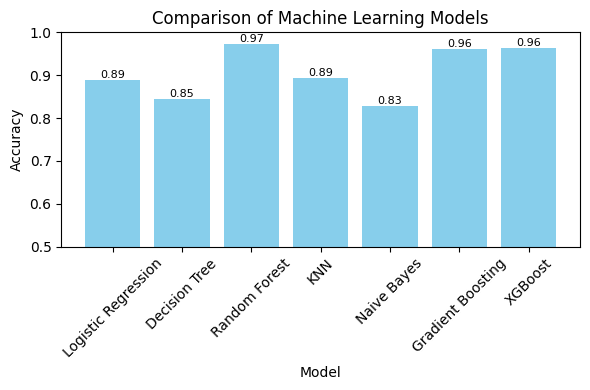

In [ ]:

# Display results as a bar plot
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(results.keys(), results.values(), color='skyblue')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Machine Learning Models')
ax.set_ylim([0.5, 1.0])

# Annotate each bar with the corresponding accuracy score
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Model: Logistic Regression
Accuracy: 0.8893805309734514
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       113
           1       0.92      0.86      0.89       113

    accuracy                           0.89       226
   macro avg       0.89      0.89      0.89       226
weighted avg       0.89      0.89      0.89       226



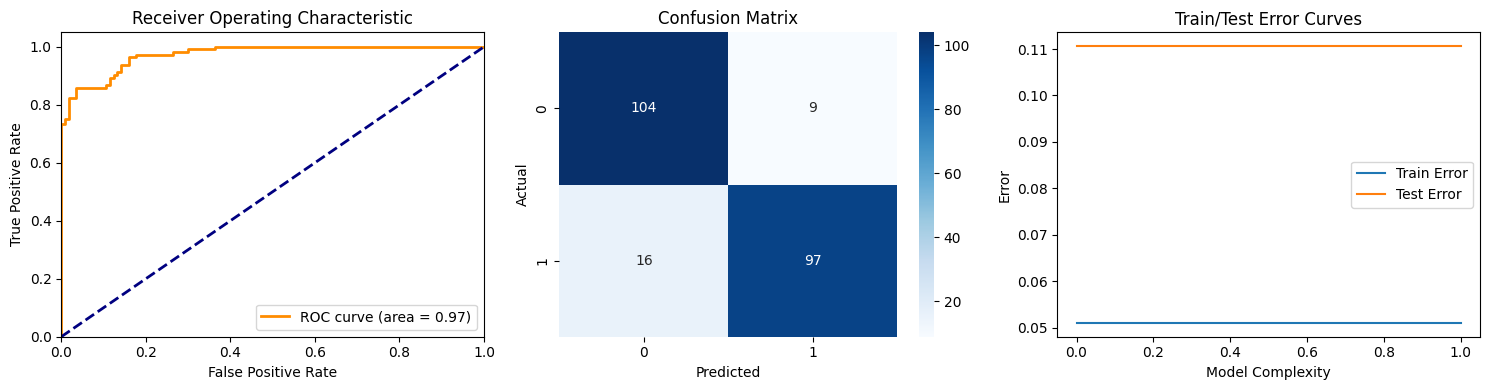

Model: Decision Tree
Accuracy: 0.8451327433628318
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       113
           1       0.88      0.80      0.84       113

    accuracy                           0.85       226
   macro avg       0.85      0.85      0.84       226
weighted avg       0.85      0.85      0.84       226



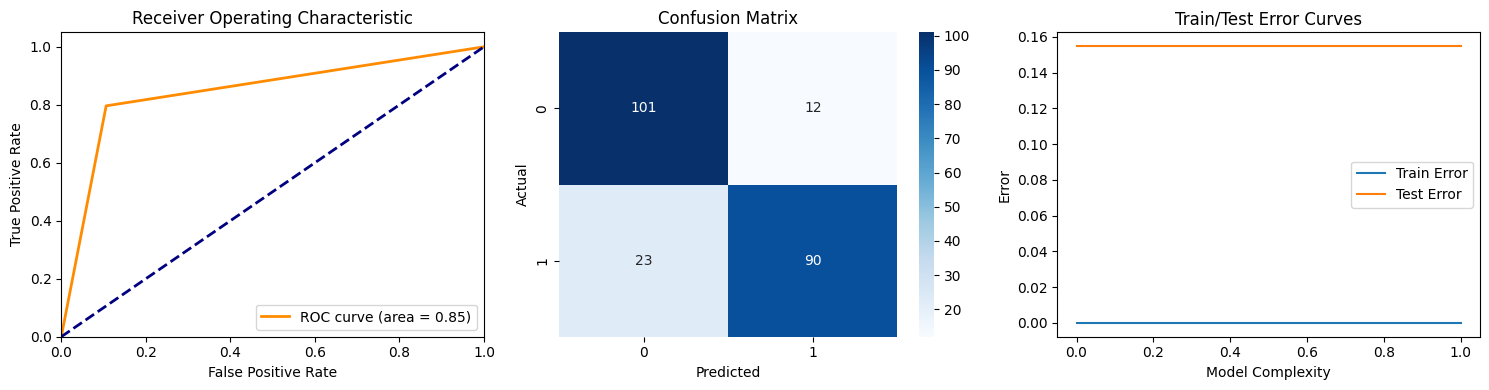

Model: Random Forest
Accuracy: 0.9734513274336283
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       113
           1       0.98      0.96      0.97       113

    accuracy                           0.97       226
   macro avg       0.97      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226



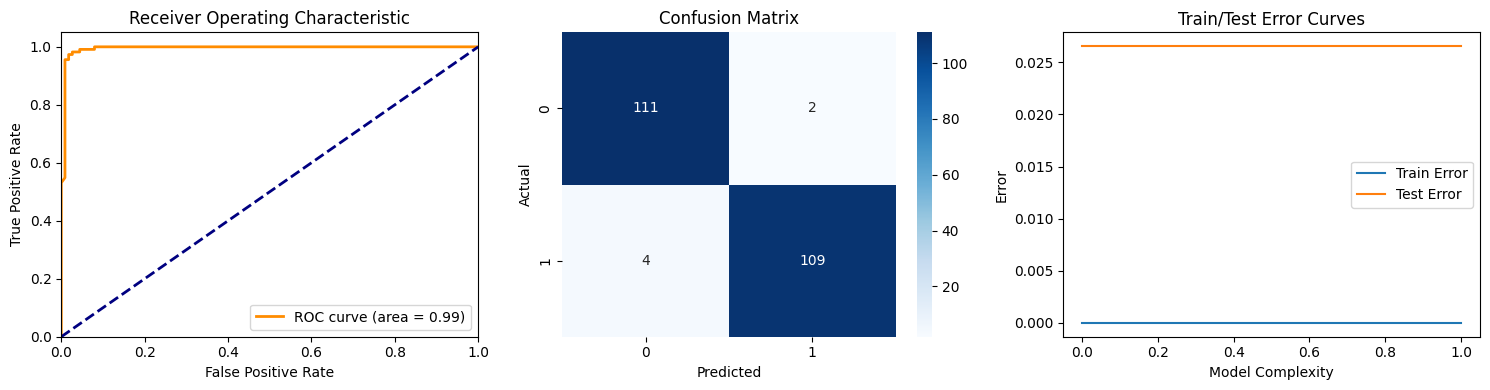

Model: KNN
Accuracy: 0.8938053097345132
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       113
           1       1.00      0.79      0.88       113

    accuracy                           0.89       226
   macro avg       0.91      0.89      0.89       226
weighted avg       0.91      0.89      0.89       226



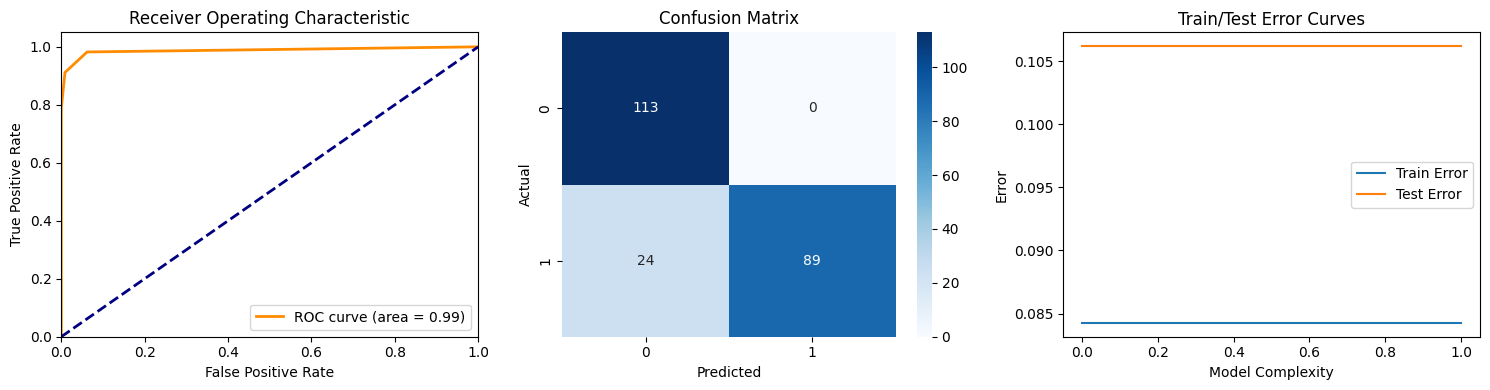

Model: Naive Bayes
Accuracy: 0.827433628318584
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       113
           1       0.80      0.87      0.83       113

    accuracy                           0.83       226
   macro avg       0.83      0.83      0.83       226
weighted avg       0.83      0.83      0.83       226



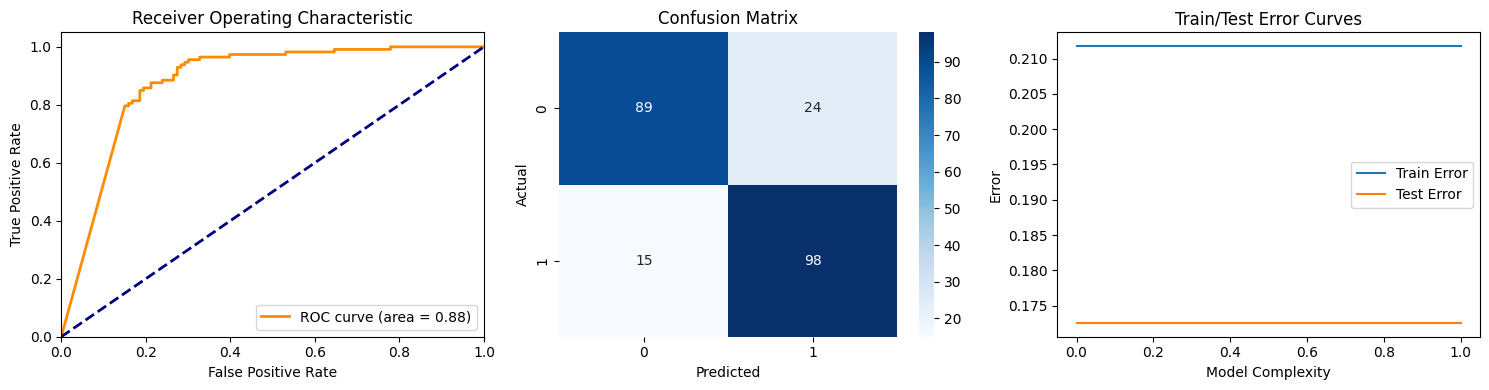

Model: Gradient Boosting
Accuracy: 0.9601769911504425
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.96      0.96      0.96       113

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



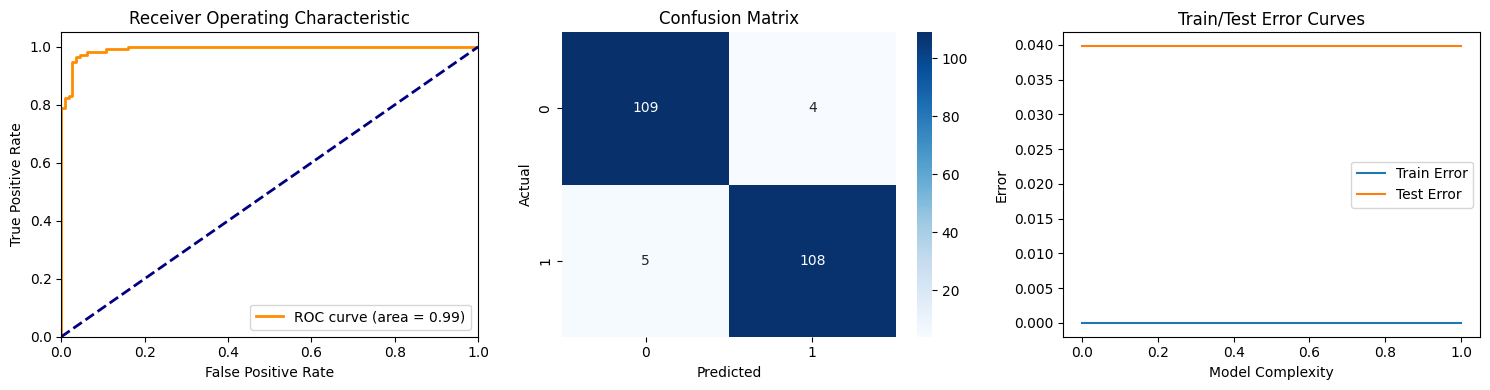

Model: XGBoost
Accuracy: 0.9646017699115044
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       113
           1       0.97      0.96      0.96       113

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



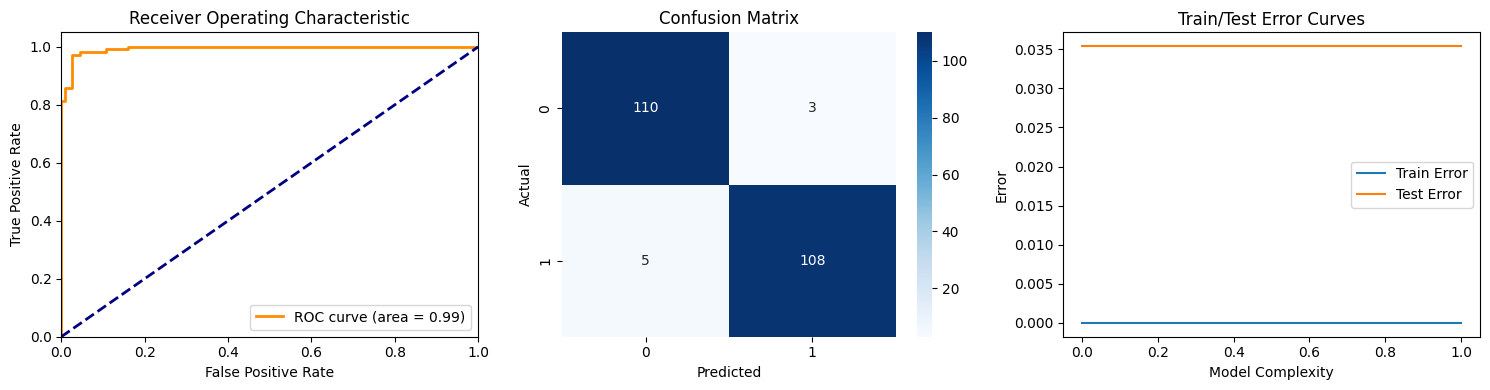

In [ ]:
for name, model in models.items():
    print(f"Model: {name}")
    EvaluateResult(X_test, y_test, model)

Modeling (kNN)

MODEL

In [ ]:
param_grid = {'n_neighbors': np.arange(3, 13)}
gs_kNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gs_kNN.fit(X_train, y_train)
print("Best Number of Neighbors:", gs_kNN.best_params_)
print("Accuracy on Training Set:", gs_kNN.best_score_)

y_pred_prob = gs_kNN.predict_proba(X_test)[:,1]
print("Accuracy on Test Set:", gs_kNN.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

Best Number of Neighbors: {'n_neighbors': 3}
Accuracy on Training Set: 0.8725414364640883
Accuracy on Test Set: 0.9380530973451328
AUC: 0.9911504424778761


Accuracy: 0.9380530973451328
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       113
           1       1.00      0.88      0.93       113

    accuracy                           0.94       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.94      0.94      0.94       226



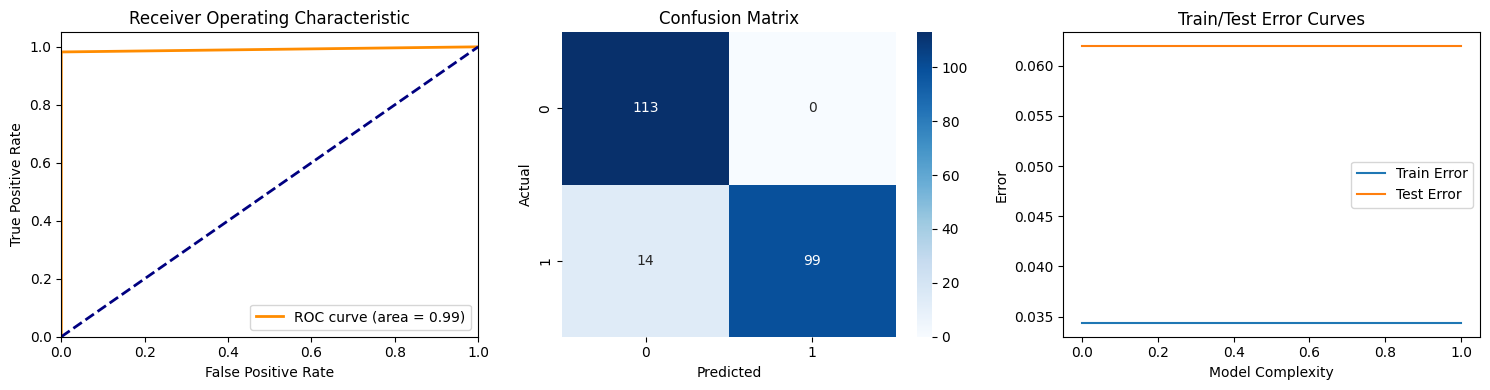

In [ ]:
EvaluateResult(X_test, y_test, gs_kNN)

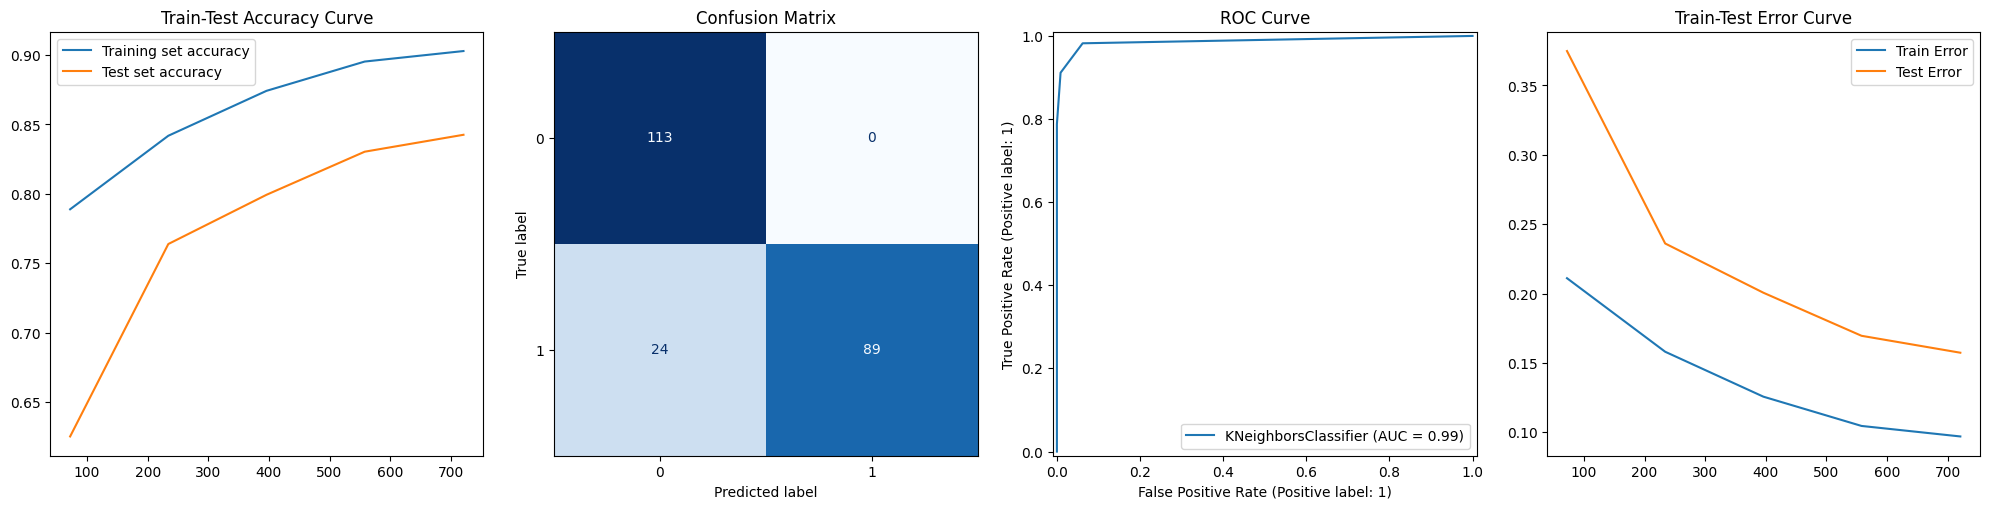

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 1. Train-Test Accuracy Curve
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
axes[0].plot(train_sizes, train_mean, label='Training set accuracy')
axes[0].plot(train_sizes, test_mean, label='Test set accuracy')
axes[0].set_title("Train-Test Accuracy Curve")
axes[0].legend()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, knn.predict(X_test))
ConfusionMatrixDisplay(cm).plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title("Confusion Matrix")

# 3. ROC Curve
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=axes[2])
axes[2].set_title("ROC Curve")

# 4. Train-Test Error Curve
axes[3].plot(train_sizes, 1 - train_mean, label="Train Error")
axes[3].plot(train_sizes, 1 - test_mean, label="Test Error")
axes[3].set_title("Train-Test Error Curve")
axes[3].legend()

plt.tight_layout()
plt.show()


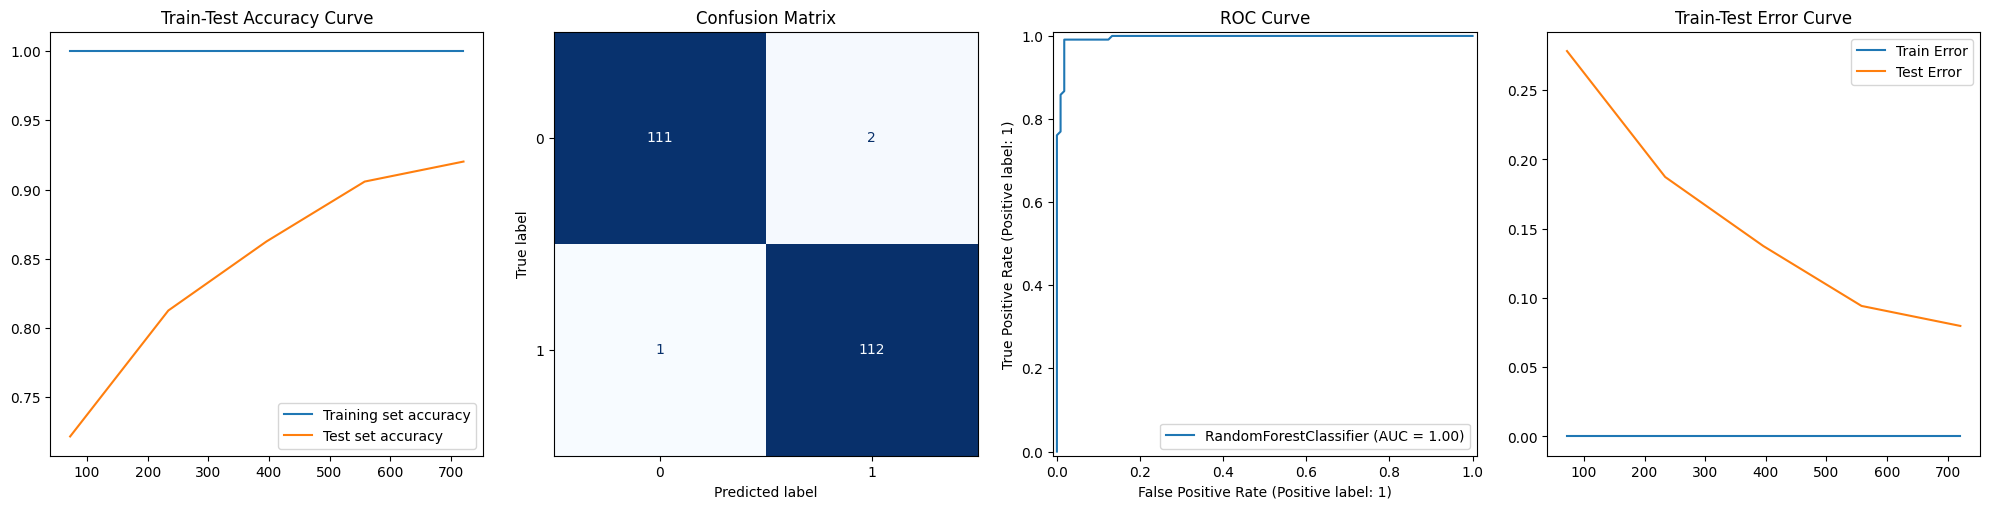

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 1. Train-Test Accuracy Curve
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
axes[0].plot(train_sizes, train_mean, label='Training set accuracy')
axes[0].plot(train_sizes, test_mean, label='Test set accuracy')
axes[0].set_title("Train-Test Accuracy Curve")
axes[0].legend()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
ConfusionMatrixDisplay(cm).plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title("Confusion Matrix")

# 3. ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=axes[2])
axes[2].set_title("ROC Curve")

# 4. Train-Test Error Curve
axes[3].plot(train_sizes, 1 - train_mean, label="Train Error")
axes[3].plot(train_sizes, 1 - test_mean, label="Test Error")
axes[3].set_title("Train-Test Error Curve")
axes[3].legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:49:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:49:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:49:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:49:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:49:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

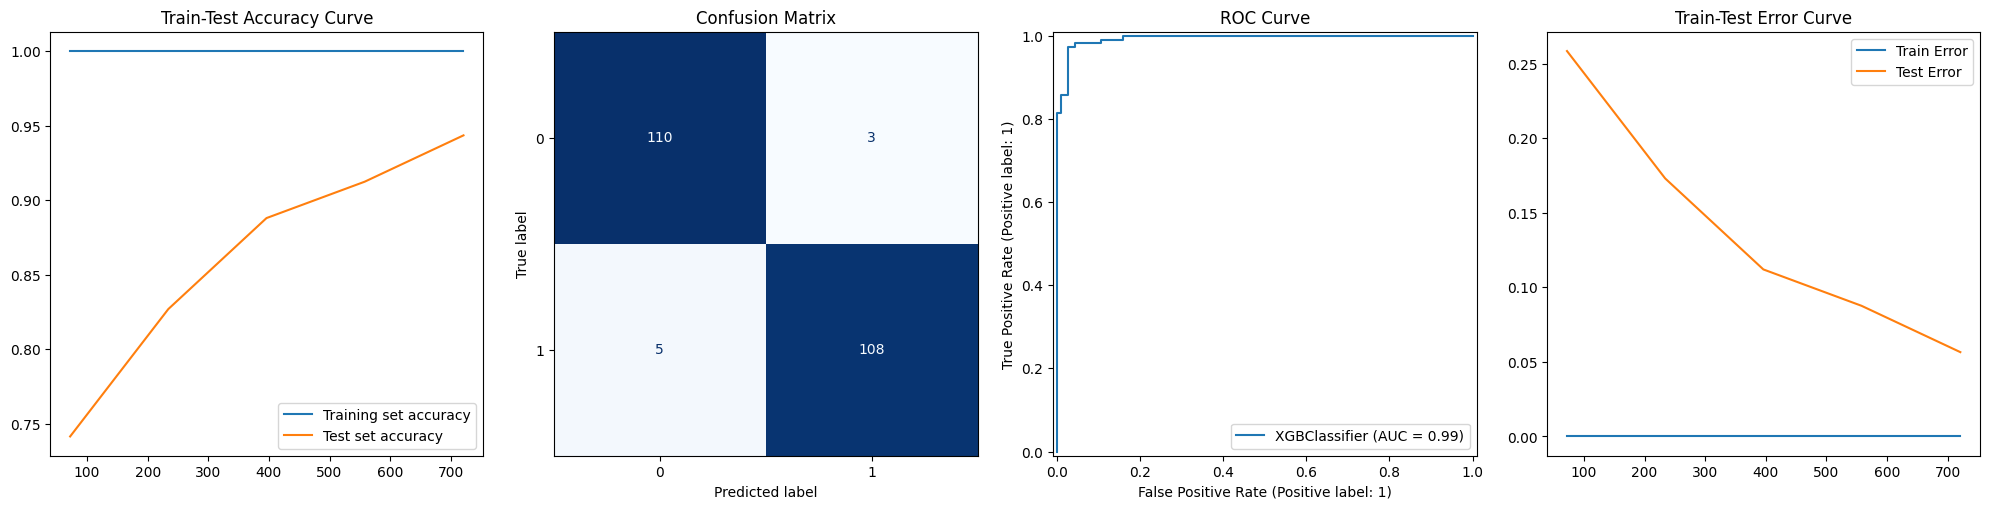

In [ ]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb.fit(X_train, y_train)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 1. Train-Test Accuracy Curve
train_sizes, train_scores, test_scores = learning_curve(xgb, X_train, y_train, cv=5)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
axes[0].plot(train_sizes, train_mean, label='Training set accuracy')
axes[0].plot(train_sizes, test_mean, label='Test set accuracy')
axes[0].set_title("Train-Test Accuracy Curve")
axes[0].legend()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, xgb.predict(X_test))
ConfusionMatrixDisplay(cm).plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title("Confusion Matrix")

# 3. ROC Curve
RocCurveDisplay.from_estimator(xgb, X_test, y_test, ax=axes[2])
axes[2].set_title("ROC Curve")

# 4. Train-Test Error Curve
axes[3].plot(train_sizes, 1 - train_mean, label="Train Error")
axes[3].plot(train_sizes, 1 - test_mean, label="Test Error")
axes[3].set_title("Train-Test Error Curve")
axes[3].legend()

plt.tight_layout()
plt.show()

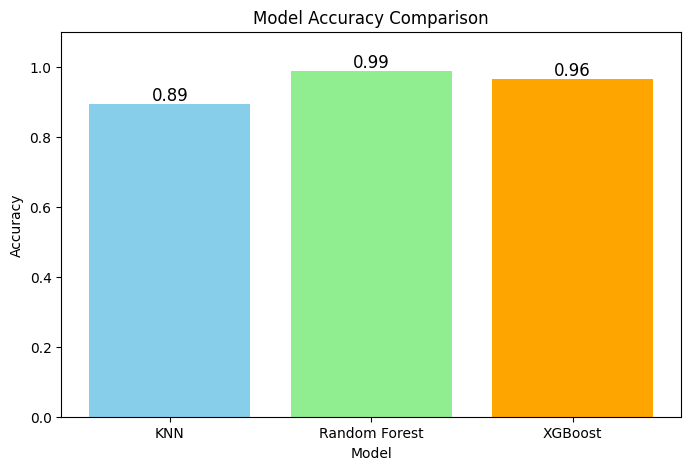

In [ ]:

knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
xgb_accuracy = accuracy_score(y_test, xgb.predict(X_test))

model_accuracies = {
    'KNN': knn_accuracy,
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy
}

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(model_accuracies.keys(), model_accuracies.values(), color=['skyblue', 'lightgreen', 'orange'])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
for i, v in enumerate(model_accuracies.values()):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
plt.ylim(0, 1.1)
plt.show()


#Hyper parameter tuning

In [1]:

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("Best Parameters for KNN:", knn_grid.best_params_)
print("Best Accuracy for KNN:", knn_grid.best_score_)

knn_tuned = knn_grid.best_estimator_


NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=0)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best Accuracy for Random Forest:", rf_grid.best_score_)

rf_tuned = rf_grid.best_estimator_


In [ ]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best Parameters for XGBoost:", xgb_grid.best_params_)
print("Best Accuracy for XGBoost:", xgb_grid.best_score_)
xgb_tuned = xgb_grid.best_estimator_


#After Tuning

In [3]:
knn_tuned_accuracy = accuracy_score(y_test, knn_tuned.predict(X_test))
rf_tuned_accuracy = accuracy_score(y_test, rf_tuned.predict(X_test))
xgb_tuned_accuracy = accuracy_score(y_test, xgb_tuned.predict(X_test))

tuned_model_accuracies = {
    'KNN (Tuned)': knn_tuned_accuracy,
    'Random Forest (Tuned)': rf_tuned_accuracy,
    'XGBoost (Tuned)': xgb_tuned_accuracy
}

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(tuned_model_accuracies.keys(), tuned_model_accuracies.values(), color=['skyblue', 'lightgreen', 'orange'])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison After Hyperparameter Tuning')
for i, v in enumerate(tuned_model_accuracies.values()):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
plt.ylim(0, 1.1)
plt.show()


NameError: name 'accuracy_score' is not defined

#Cross validation

In [4]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and calculate mean accuracy for each model
knn_cv_scores = cross_val_score(knn_tuned, X, y, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_tuned, X, y, cv=5, scoring='accuracy')
xgb_cv_scores = cross_val_score(xgb_tuned, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("KNN Cross-Validation Accuracy: Mean = {:.2f}, Std = {:.2f}".format(knn_cv_scores.mean(), knn_cv_scores.std()))
print("Random Forest Cross-Validation Accuracy: Mean = {:.2f}, Std = {:.2f}".format(rf_cv_scores.mean(), rf_cv_scores.std()))
print("XGBoost Cross-Validation Accuracy: Mean = {:.2f}, Std = {:.2f}".format(xgb_cv_scores.mean(), xgb_cv_scores.std()))


NameError: name 'knn_tuned' is not defined

#Ensamble

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('KNN', knn_tuned),
        ('Random Forest', rf_tuned),
        ('XGBoost', xgb_tuned)
    ],
    voting='soft'
)

ensemble.fit(X_train, y_train)

ensemble_accuracy = accuracy_score(y_test, ensemble.predict(X_test))
print("Ensemble Model Accuracy:", ensemble_accuracy)


Tried tuning , cross validation and ensamble and the best model we got or Selecting as -